In [5]:
import pandas as pd

C:\Users\hamza\AppData\Local\Temp\ipykernel_21396\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [22]:
df = pd.read_csv('players_blegium_japan.csv')
#df = pd.read_csv('playersNball.csv')


In [23]:
df_pressure=None

In [24]:
df_pressure= pd.DataFrame(columns=['position_x','position_y', 'pressure_rating'])

In [25]:
df_pressure

,position_x,position_y,pressure_rating


In [27]:
import numpy as np

points=[]
# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Initialize pressure rating column
df_pressure['pressure_rating'] = 0

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # if index ==94:
    #     break
    if row['ball_posession'] == 1:
        # Get the x, y coordinates of the ball possession event
        ball_pos_x = row['x']
        ball_pos_y = row['y']
        frame = row['frame']
        points.append((ball_pos_x, ball_pos_y))
        # Calculate distances from the ball possession event to all other events in the same frame
        distances = []
        for _, event_row in df[(df['frame'] == frame) & (df['ball_posession'] == 0)].iterrows():
            event_x = event_row['x']
            event_y = event_row['y']
            distance = euclidean_distance((ball_pos_x, ball_pos_y), (event_x, event_y))
            distances.append(distance)
        
        # Update pressure rating for each event in the same frame
        df_pressure['pressure_rating'] = distances

print(df_pressure)

ValueError: Length of values (11) does not match length of index (9)

In [ ]:
import numpy as np

xpoints=[]
ypoints=[]
pRating=[]
# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Radius for pressure calculation
radius = 5

# Initialize pressure rating column
df['pressure_rating'] = 0

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    if row['ball_posession'] == 1:
        # Get the x, y coordinates of the ball possession event
        ball_pos_x = row['x']
        ball_pos_y = row['y']
        frame = row['frame']
        # Calculate distances from the ball possession event to all other events in the same frame
        distances = []
        for _, event_row in df[(df['frame'] == frame) & (df['ball_posession'] == 0)].iterrows():
            event_x = event_row['x']
            event_y = event_row['y']
            distance = euclidean_distance((ball_pos_x, ball_pos_y), (event_x, event_y))
            # Calculate pressure rating considering the radius
            if distance <= radius:
                # Check if the event belongs to the opposite team
                if event_row['teamId'] != row['teamId']:
                    pressure = max(0, radius - distance)  # Subtract distance from radius
                    if distance == 5: 
                        pressure = 0.3
                    distances.append(pressure)
        
        # Update pressure rating for each event in the same frame
        if distances:
            avg_pressure = sum(distances) / len(distances)  # Average pressure if multiple players detected
            pRating.append(avg_pressure)
        xpoints.append(ball_pos_x)
        ypoints.append(ball_pos_y)
        
print(len(pRating))
# Create DataFrame
df_pressure = pd.DataFrame({
    "Starting_Point": xpoints,
    "Ending_Point": ypoints,
    # "PassCompletion":pRating
})

print(df_pressure)

130
     Starting_Point  Ending_Point
0                96            70
1               100            68
2               100            68
3                99            68
4                92            62
..              ...           ...
242              92            48
243              92            48
244              93            47
245              80            48
246              98            37

[247 rows x 2 columns]


In [ ]:
# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Radius for pressure calculation
radius = 5

# Initialize pressure list
pressure = []

# Initialize lists to store x and y points
xpoints = []
ypoints = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    if row['teamId']!= 'Green':
        if index == 74:
            break
        if row['ball_posession'] == 1:
            # Get the x, y coordinates of the ball possession event
            ball_pos_x = row['x']
            ball_pos_y = row['y']
            frame = row['frame']
            
            # Append x and y points
            xpoints.append(ball_pos_x)
            ypoints.append(ball_pos_y)
            
            # Calculate distances from the ball possession event to all other events in the same frame
            distances = []
            for _, event_row in df[(df['frame'] == frame) & (df['ball_posession'] == 0)].iterrows():
                if event_row['teamId'] != 'Green':
                    event_x = event_row['x']
                    event_y = event_row['y']
                    distance = euclidean_distance((ball_pos_x, ball_pos_y), (event_x, event_y))
                    # Calculate pressure rating considering the radius
                    if distance <= radius:
                        # Check if the event belongs to the opposite team
                        if event_row['teamId'] != row['teamId']:
                            pressure.append(max(0, radius - distance))  # Subtract distance from radius and append to pressure list
                            # print("jere:", pressure)
            
            # Update pressure rating for each event in the same frame
            if pressure:
                avg_pressure = sum(pressure) / len(pressure)  # Average pressure if multiple players detected
                df.loc[(df['frame'] == frame) & (df['ball_posession'] == 0), 'pressure_rating'] = avg_pressure
                print(avg_pressure)

# Create DataFrame df_pressure
df_pressure = pd.DataFrame({
    "x_Point": xpoints,
    "y_Point": ypoints,
    # "PressureRating": pressure  # Use the pressure list
})

# len(p)
print(df_pressure)

NameError: name 'df' is not defined

In [ ]:
# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Radius for pressure calculation
radius = 5

# Initialize lists to store x and y points
xpoints = []
ypoints = []
pressures = []
p=[]
# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    if index == 63:
            break
    if row['ball_posession'] == 1:
        # Get the x, y coordinates of the ball possession event
        ball_pos_x = row['x']
        ball_pos_y = row['y']
        frame = row['frame']
        
        # Append x and y points
        xpoints.append(ball_pos_x)
        ypoints.append(ball_pos_y)
        
        # Calculate distances from the ball possession event to all other events in the same frame
        distances = []
        for _, event_row in df[(df['frame'] == frame) & (df['ball_posession'] == 0)].iterrows():
            event_x = event_row['x']
            event_y = event_row['y']
            distance = euclidean_distance((ball_pos_x, ball_pos_y), (event_x, event_y))
            
            # Calculate pressure rating considering the radius
            if distance <= radius:
                # Check if the event belongs to the opposite team
                if event_row['teamId'] != row['teamId']:
                    pressures.append(max(0, radius - distance))  # Subtract distance from radius and append to pressures list
        
        # Calculate the average pressure rating for the frame
        if pressures:
            avg_pressure = sum(pressures) / len(pressures)  # Average pressure if multiple players detected
            p.append(avg_pressure)  # Append average pressure to pressures list


print(pressures)
# Create DataFrame df_pressure
df_pressure = pd.DataFrame({
    "x_Point": xpoints,
    "y_Point": ypoints,
    # "PressureRating": pressures  # Use the pressures list
})

print(df_pressure)

NameError: name 'df' is not defined

In [ ]:
# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Radius for pressure calculation
radius = 5

# Initialize lists to store x and y points
xpoints = []
ypoints = []
pressures = []
p=[]

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    if row['ball_posession'] == 1:
        # Reset the pressures list for each ball possession event
        pressures = []
        
        # Get the x, y coordinates of the ball possession event
        ball_pos_x = row['x']
        ball_pos_y = row['y']
        frame = row['frame']
        
        # Append x and y points
        xpoints.append(ball_pos_x)
        ypoints.append(ball_pos_y)
        
        # Calculate distances from the ball possession event to all other events in the same frame
        distances = []
        for _, event_row in df[(df['frame'] == frame) & (df['ball_posession'] == 0)].iterrows():
            event_x = event_row['x']
            event_y = event_row['y']
            distance = euclidean_distance((ball_pos_x, ball_pos_y), (event_x, event_y))
            
            # Calculate pressure rating considering the radius
            if distance <= radius:
                # Check if the event belongs to the opposite team
                if event_row['teamId'] != row['teamId']:
                    pressures.append(max(0, radius - distance))  # Subtract distance from radius and append to pressures list
        
        # Calculate the average pressure rating for the frame
        if pressures:
            avg_pressure = sum(pressures) / len(pressures)  # Average pressure if multiple players detected
            p.append(avg_pressure)  # Append average pressure to pressures list
        else: 
            p.append(0)

# Create DataFrame df_pressure
df_pressure = pd.DataFrame({
    "x_Point": xpoints,
    "y_Point": ypoints,
    "PressureRating": p  # Use the pressures list
})
print(df_pressure)

NameError: name 'df' is not defined

In [ ]:
#do tosql df_pressure

In [ ]:
#maximum pressure rating
max_pressure = df_pressure['PressureRating'].max()
print(max_pressure)

4.0


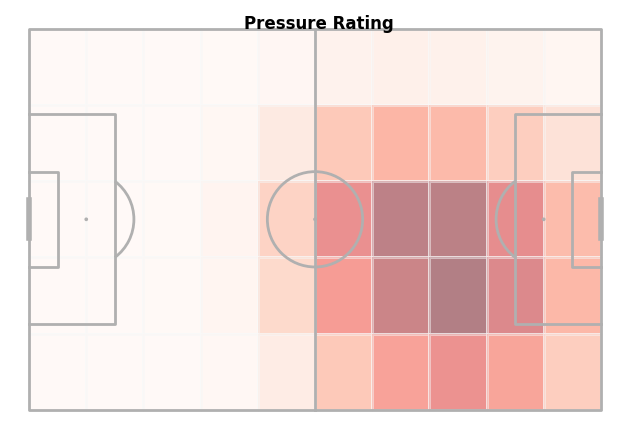

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.ndimage import gaussian_filter

from mplsoccer import Pitch

pitch = Pitch(line_zorder=2)
fig, ax = pitch.draw()

# Calculate the bin statistic with weights based on pressure rating
bin_statistic = pitch.bin_statistic(
    df_pressure['x_Point'], df_pressure['y_Point'], df_pressure['PressureRating'], bins=(10, 5)
)

# Gaussian smoothing of the bin statistic
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], sigma=1)

# Plot the smoothed heatmap
heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='#f9f9f9', alpha=0.5)
ax.text(45, 0, "Pressure Rating", fontsize=12, color='black', weight='bold')

plt.show()
